In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#data_folder = "/Users⁩/supertramp⁩/Documents⁩/GitHub⁩/IDS-project⁩/data/";
#data = pd.read_csv(data_folder + "activities.csv")

In [25]:
dataset = pd.read_csv("activities.csv", encoding= 'unicode_escape')
dataset = dataset[dataset['Activity Type'].str.match('Run')]

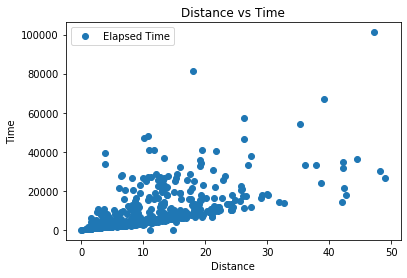

In [26]:
dataset.plot(x='Distance', y='Elapsed Time', style='o')  
plt.title('Distance vs Time')  
plt.xlabel('Distance')  
plt.ylabel('Time')  
plt.show()

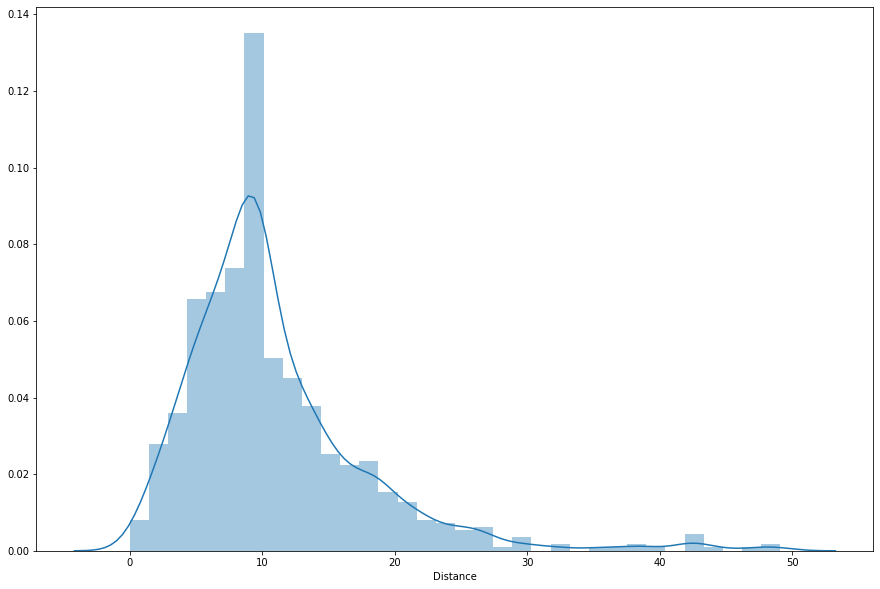

In [27]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Distance'])

In [40]:

predictors = ['Distance', 'Max Speed', 'Elevation Gain',
             'Max Grade', 'Average Grade'];

# extra predictors that van be used later are: "Calories", 'Average Temperature',  'Elevation Loss', 'Relative Effort', 'Relative Effort'

get rid of NaN values


In [50]:

from sklearn.impute import SimpleImputer

variables_to_use = ['Distance', 'Max Speed', 'Elevation Gain',
             'Max Grade', 'Average Grade','Elapsed Time']
dataset_final = dataset[variables_to_use]


dataset_final.apply(lambda x: x.fillna(x.mean()),axis=0)
dataset_final = dataset_final.reset_index()
#dataset_final.mean()

In [84]:
X = dataset_final[predictors]
y = dataset_final['Elapsed Time']
X = X.fillna(0)

In [85]:

#X = X.fillna(lambda x: x.median())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X.isnull().any()

Distance          False
Max Speed         False
Elevation Gain    False
Max Grade         False
Average Grade     False
dtype: bool

In [86]:
regressor = LinearRegression()  
LR = regressor.fit(X_train, y_train) #training the algorithm

In [87]:
LR.score(X_test, y_test)

0.6785969408045154

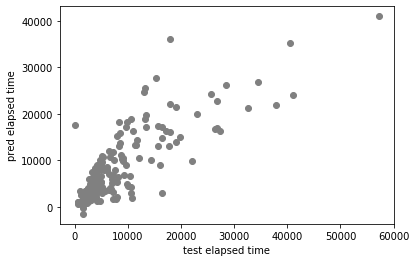

In [88]:
y_pred = LR.predict(X_test)
plt.figure()
plt.scatter(y_test, y_pred, color = 'gray')
plt.xlabel('test elapsed time')
plt.ylabel('pred elapsed time')
plt.show()